In [2]:
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import pickle
import glob
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
reload(sa)
reload(sc)

<module 'neuraltda.simpComp' from '/home/brad/code/NeuralTDA/neuraltda/simpComp.pyc'>

In [ ]:
blockPath = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site03_Z3000__B1235_cat_P02_S03_1/'
bdf = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site03_Z3000__B1235_cat_P02_S03_1/binned_data/20170128T005306Z/20170128T005306Z-10.0-5.0.binned'
scgf = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site03_Z3000__B1235_cat_P02_S03_1/scg/20170128T005306Z-10.0-5.0.scg'

In [5]:
blockPath = '/mnt/cube/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/'

#blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
#Load simplicial chain generator dictionary
scgfs = glob.glob(os.path.join(blockPath, 'scg/*.scg'))[0]
print(scgfs)
with open(scgfs, 'r') as scgf:
    scg = pickle.load(scgf)

/mnt/cube/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/scg/20170209T205846Z-25.0-12.5-10.0.scg


In [6]:
scg.keys()

[u'F_scaled_burung',
 u'K_scaled_burung',
 u'O_scaled_burung',
 u'P_scaled_burung',
 u'M_scaled_burung',
 u'C_scaled_burung',
 u'G_scaled_burung',
 u'H_scaled_burung',
 u'E_scaled_burung',
 u'L_scaled_burung',
 u'I_scaled_burung',
 u'J_scaled_burung',
 u'N_scaled_burung',
 u'D_scaled_burung',
 u'A_scaled_burung',
 u'B_scaled_burung']

In [7]:

stimtrials = [(s, t) for s in scg.keys() for t in range(20)]
stimtrials = [(s, t) for s in scg.keys()[0:5] for t in range(5)]
stimtrials
labs = [str(s[0])+ str(s[1]) for s in stimtrials]

In [ ]:
stimtrials = [(s, t) for s in ['T40S40D3', 'T40S70D3', 'T-1S-1D40'] for t in range(5)]
stimtrials = [(s, t) for s in scg.keys() for t in range(5)]

In [8]:
print(stimtrials)

[(u'F_scaled_burung', 0), (u'F_scaled_burung', 1), (u'F_scaled_burung', 2), (u'F_scaled_burung', 3), (u'F_scaled_burung', 4), (u'K_scaled_burung', 0), (u'K_scaled_burung', 1), (u'K_scaled_burung', 2), (u'K_scaled_burung', 3), (u'K_scaled_burung', 4), (u'O_scaled_burung', 0), (u'O_scaled_burung', 1), (u'O_scaled_burung', 2), (u'O_scaled_burung', 3), (u'O_scaled_burung', 4), (u'P_scaled_burung', 0), (u'P_scaled_burung', 1), (u'P_scaled_burung', 2), (u'P_scaled_burung', 3), (u'P_scaled_burung', 4), (u'M_scaled_burung', 0), (u'M_scaled_burung', 1), (u'M_scaled_burung', 2), (u'M_scaled_burung', 3), (u'M_scaled_burung', 4)]


## Compute Distance Matrix

In [10]:
beta = 0.15
divsave = []
d = 1
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        stim1 = stimtrials[ind][0]
        t1 = stimtrials[ind][1]
        stim2 = stimtrials[ind2][0]
        t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        scg1 = scg[stim1][t1]
        scg2 = scg[stim2][t2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        mE = sc.maxEnt(scgTot, d)
        
        D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scg1)
        D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scg2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, t1), (stim2, t2), div))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
len(divsave)

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in divide
/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in divide


([<matplotlib.axis.YTick at 0x7f7b53f3fed0>,
 <a list of 10 Text yticklabel objects>)

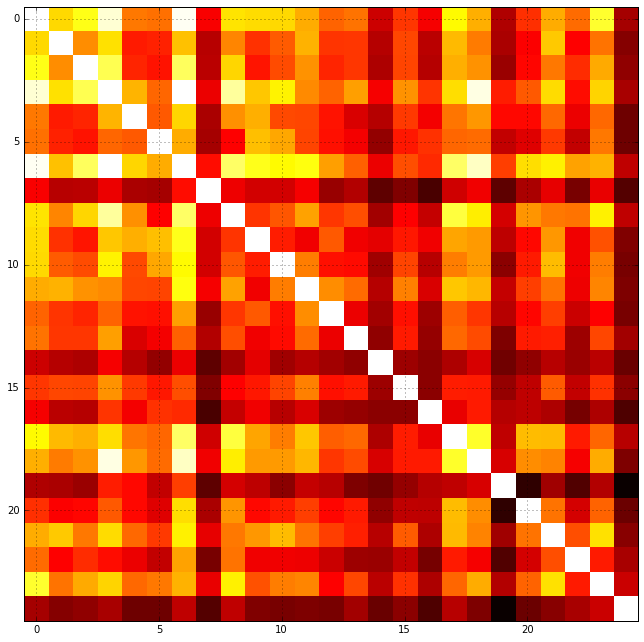

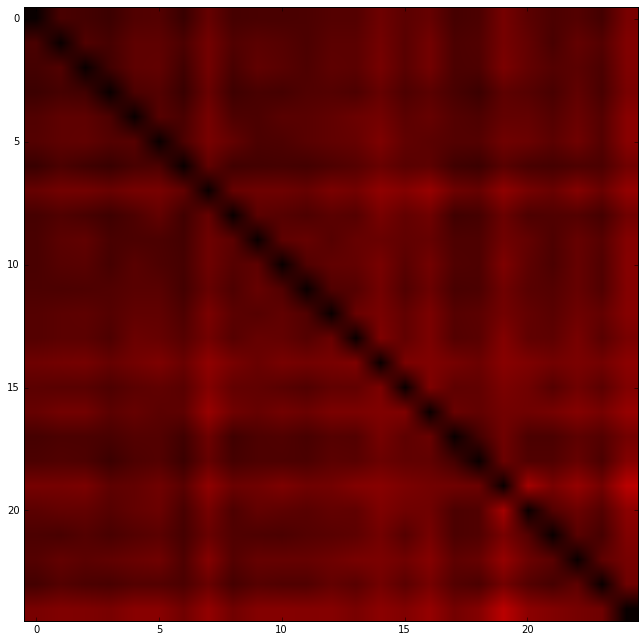

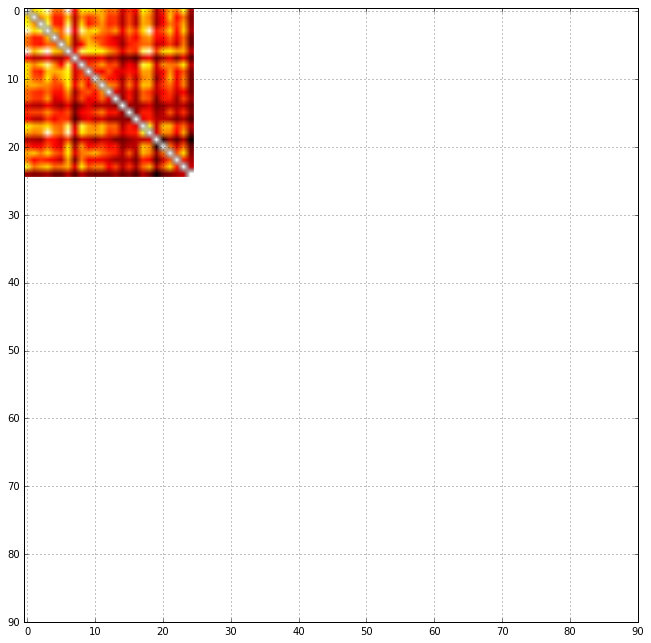

In [11]:
d = 2

mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[2]

mat = mat + mat.T
pickle.dump(mat, open('B604_P01S15_Lap1_0.15_dmat.pkl', 'w'))
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), 5))
plt.yticks(np.arange(0, len(stimtrials),5))
#plt.savefig('/Users/brad/B1235_P02S01_1LaplacianComparison.pdf', format='pdf')
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
plt.clim(0, 0.5)

plt.figure(figsize=(11,11))
normmat = mat/np.max(np.max(mat))
plt.imshow(1.0/normmat)
plt.grid(True)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0,100, 10))

In [12]:
from scipy.cluster import hierarchy as ha

stimlabels = [str(s[0]) for s in stimtrials]
print(stimlabels)
# First define the leaf label function.
n = len(stimtrials)
def llf(id):
    if id < n:
        return stimlabels[id]
    else:
        return '[%d]' % (id)

['F_scaled_burung', 'F_scaled_burung', 'F_scaled_burung', 'F_scaled_burung', 'F_scaled_burung', 'K_scaled_burung', 'K_scaled_burung', 'K_scaled_burung', 'K_scaled_burung', 'K_scaled_burung', 'O_scaled_burung', 'O_scaled_burung', 'O_scaled_burung', 'O_scaled_burung', 'O_scaled_burung', 'P_scaled_burung', 'P_scaled_burung', 'P_scaled_burung', 'P_scaled_burung', 'P_scaled_burung', 'M_scaled_burung', 'M_scaled_burung', 'M_scaled_burung', 'M_scaled_burung', 'M_scaled_burung']


/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  from ipykernel import kernelapp as app


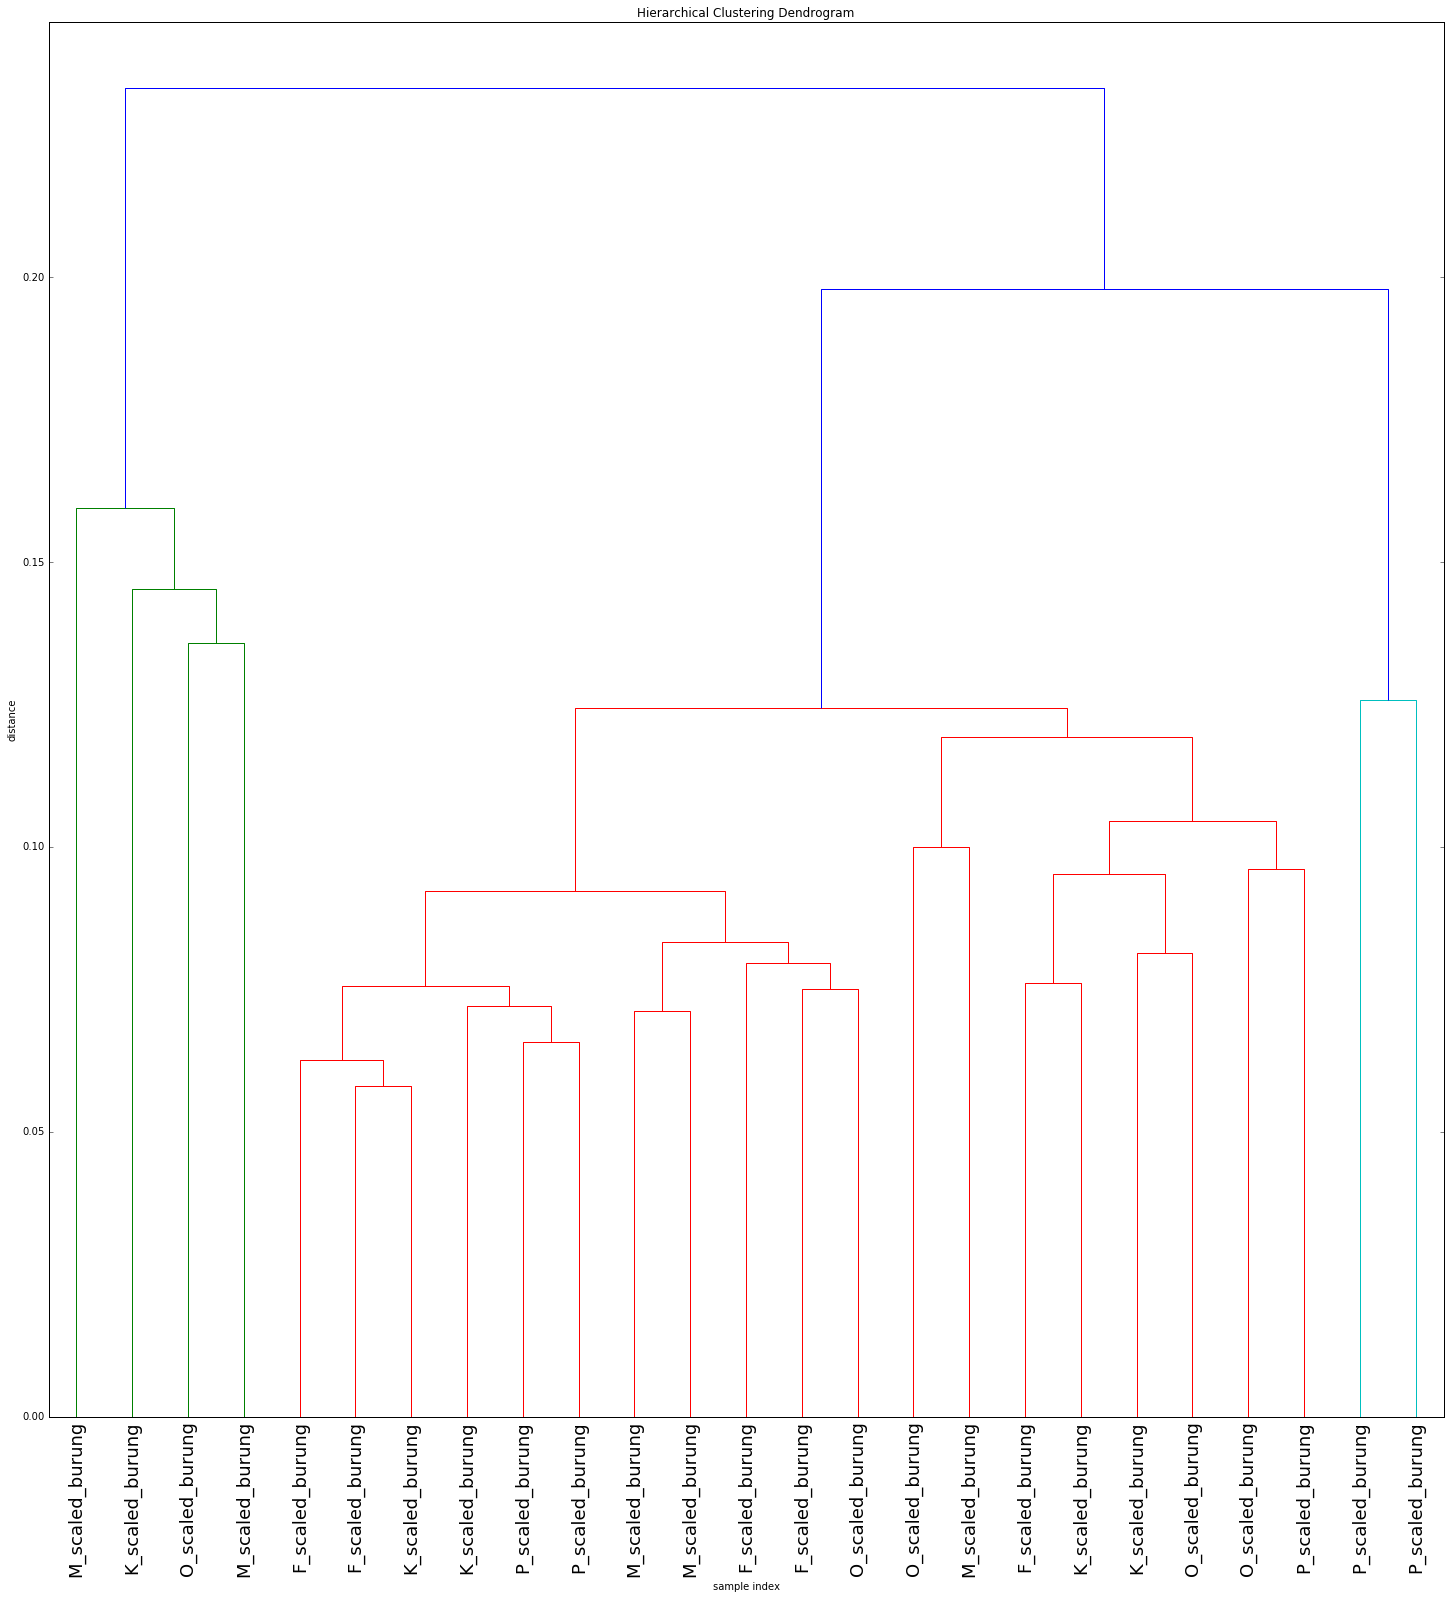

In [13]:
linmat = mat[np.triu_indices(len(stimtrials))]
Z = ha.linkage(mat, method='complete')
# calculate full dendrogram
plt.figure(figsize=(25, 25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ha.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
    leaf_label_func=llf
)
plt.show()

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:19: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


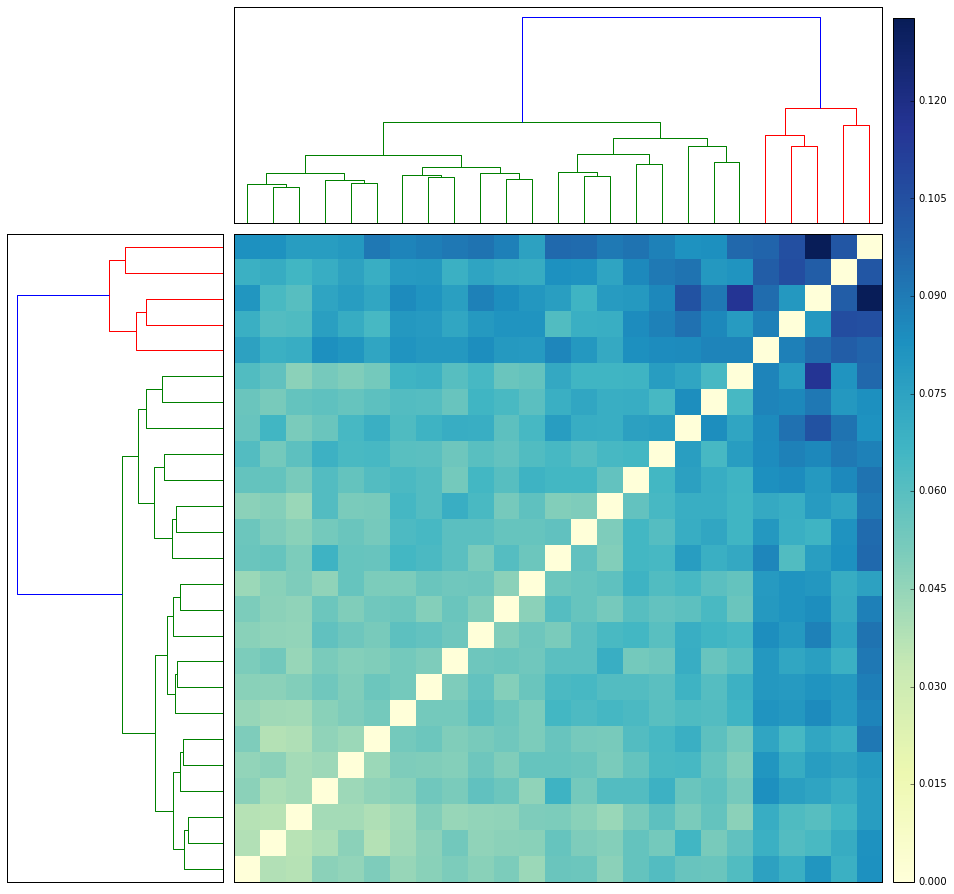

In [15]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate features and distance matrix.
D = mat
method = 'ward'
# Compute and plot dendrogram.
fig = pylab.figure(figsize=(15,15))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method=method)
Z1 = sch.dendrogram(Y, orientation='left')
ax1.set_xticks([])
ax1.set_yticks([])


# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method=method)
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])


# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
plt.colorbar(im, cax=axcolor)

# Display and save figure.
fig.show()
#fig.savefig('/home/brad/B604_P01S15_Lap1_AllStims_dendrogram.png')

In [ ]:
from sklearn.manifold import MDS

matMDS = MDS(n_components=2, dissimilarity='precomputed')
matMDS.fit(mat)
pts = matMDS.embedding_
#pts = np.log(pts)

plt.plot(pts[:, 0], pts[:, 1], 'b.')

In [ ]:
r = np.diag(np.sqrt(np.dot(pts, pts.T)))
theta = np.arctan2(pts[:, 1], pts[:, 0])


In [ ]:
lr = np.log(r)
ptsx = lr*np.cos(theta)
ptsy = lr*np.sin(theta)

In [ ]:
plt.plot(ptsx, ptsy, '.', pts[:, 0], pts[:, 1], 'r.')

In [ ]:
from scipy.cluster import hierarchy as ha

linmat = mat[np.triu_indices(len(stimtrials))]
z = ha.linkage(linmat)

In [ ]:
divsavefile = './B1235_P02S01_divsave.pkl'
with open(divsavefile, 'w') as f:
    pickle.dump(divsave, f)

In [ ]:
scgTot

In [ ]:
E = sc.simplicialChainGroups([(1,2,3)])
(t, basis) = sc.stimSpaceGraph(E, sc.boundaryOperatorMatrix(E))
print(t)
print(basis)

In [ ]:
gms = sc.adjacency2maxsimp(t)

Egraph = sc.simplicialChainGroups(gms)
Dgraph = sc.boundaryOperatorMatrix(Egraph)
print(Dgraph)
print(Egraph)
sc.laplacian(sc.boundaryOperatorMatrix(Egraph), 0)

In [ ]:
sc.graphLaplacian(t)

In [ ]:
np.dot(Dgraph[1], Dgraph[1].T)
np.dot(Dgraph[0].T, Dgraph[0])

In [ ]:
(t, basis) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
print(t)
print(basis)
gms = sc.adjacency2maxsimp(t)

Egraph = sc.simplicialChainGroups(gms)
Dgraph = sc.boundaryOperatorMatrix(Egraph)
print(Dgraph)
print(Egraph)
sc.laplacian(sc.boundaryOperatorMatrix(Egraph), 0)

In [ ]:
ntrials = 5
stimtrials = [(s, t) for s in scg.keys() for t in range(20)]
stimtrials = [(s, t) for s in scg.keys()[0:2] for t in range(ntrials)]
stimtrials

In [ ]:
s1 = sc.simplicialChainGroups([(1,2,3)])
s2 = sc.simplicialChainGroups([(4,5,6)])
stimtrials = (s1, s2)


In [ ]:
beta = 1
divsave = []
d = 0
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        stim1 = stimtrials[ind][0]
        t1 = stimtrials[ind][1]
        stim2 = stimtrials[ind2][0]
        t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        scg1 = scg[stim1][t1]
        scg2 = scg[stim2][t2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        (adjTot, basisTot) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
        (adj1, basis1) = sc.stimSpaceGraph(scg1, sc.boundaryOperatorMatrix(scg1))
        (adj2, basis2) = sc.stimSpaceGraph(scg2, sc.boundaryOperatorMatrix(scg2))
        
        EgraphTot = sc.simplicialChainGroups(sc.adjacency2maxsimp(adjTot, basisTot))
        Egraph1 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj1, basis1))
        Egraph2 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj2, basis2))
        D1 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph1)
        D2 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, t1), (stim2, t2), div))
        
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):
    mat[iu1[0][ind], iu1[1][ind]] = x[2]
mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='none')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials),ntrials))
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
#plt.clim(0, 0.5)



In [ ]:
from sklearn.manifold import MDS

matMDS = MDS(n_components=2, dissimilarity='precomputed')
matMDS.fit(mat)
pts = matMDS.embedding_
#pts = np.log(pts)

plt.plot(pts[:, 0], pts[:, 1], 'b.')

In [ ]:
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):
    mat[iu1[0][ind], iu1[1][ind]] = x[2]
mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='none')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials),ntrials))
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
plt.clim(0, 0.5)

plt.figure(figsize=(11,11))
normmat = mat/np.max(np.max(mat))
plt.imshow(1.0/normmat)
plt.grid(True)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0,100, 10))

In [ ]:
scg1 = sc.simplicialChainGroups([(1,2,3)])
scg2 = sc.simplicialChainGroups([(4,5,6)])
scgTot = sc.simplexUnion(scg1, scg2)
(adjTot, basisTot) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
(adj1, basis1) = sc.stimSpaceGraph(scg1, sc.boundaryOperatorMatrix(scg1))
(adj2, basis2) = sc.stimSpaceGraph(scg2, sc.boundaryOperatorMatrix(scg2))
        
EgraphTot = sc.simplicialChainGroups(sc.adjacency2maxsimp(adjTot, basisTot))
Egraph1 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj1, basis1))
Egraph2 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj2, basis2))
D1 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph1)
D2 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph2)
print(D1)
print(D2)

In [ ]:
s1 = sc.simplicialChainGroups([(1,2,3)])
s2 = sc.simplicialChainGroups([(4,5,6)])
stimtrials = []

ntrials = 5
for ind in range(ntrials):
    n = np.random.rand(15, 200)
    n = (n > 0.9).astype(int)
    maxSimpList = sorted(sc.binarytomaxsimplex(n, rDup=True))
    E = sc.simplicialChainGroups(maxSimpList)
    stimtrials.append(E)

beta = 1
divsave = []
d = 0
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        #stim1 = stimtrials[ind][0]
        #t1 = stimtrials[ind][1]
        #stim2 = stimtrials[ind2][0]
        #t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        #scg1 = scg[stim1][t1]
        #scg2 = scg[stim2][t2]
        stim1 = ind
        stim2 = ind2
        t1 = stim1
        t2 = stim2
        scg1 = stimtrials[ind]
        scg2 = stimtrials[ind2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        (adjTot, basisTot) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
        (adj1, basis1) = sc.stimSpaceGraph(scg1, sc.boundaryOperatorMatrix(scg1))
        (adj2, basis2) = sc.stimSpaceGraph(scg2, sc.boundaryOperatorMatrix(scg2))
        
        EgraphTot = sc.simplicialChainGroups(sc.adjacency2maxsimp(adjTot, basisTot))
        Egraph1 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj1, basis1))
        Egraph2 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj2, basis2))
        D1 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph1)
        D2 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, t1), (stim2, t2), div))
 

In [ ]:
       
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):
    mat[iu1[0][ind], iu1[1][ind]] = x[2]
mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='none')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials),ntrials))
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :], interpolation='none')
plt.clim(0, 0.5)

In [ ]:
ds = mat[np.triu_indices(len(stimtrials))]

In [ ]:
dontcare = plt.hist(ds, bins=100)

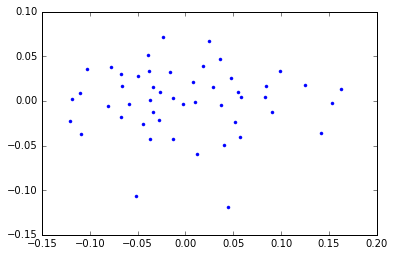

In [19]:
from sklearn.manifold import MDS

matMDS = MDS(n_components=2, dissimilarity='precomputed')
matMDS.fit(mat)
pts = matMDS.embedding_
#pts = np.log(pts)

plt.plot(pts[:, 0], pts[:, 1], 'b.')

In [ ]:
stimSimplexes = []
for stim in scg.keys():
    stimTotalSimplex = [[]]
    stimData = scg[stim]
    for trial in stimData.keys():
        #print((stim, trial))
        trialData = stimData[trial]
        stimTotalSimplex = sc.simplexUnion(stimTotalSimplex, trialData)
    stimSimplexes.append((stim, stimTotalSimplex))

beta = 0.25
divsave = []
d = 0
for ind in range(len(stimSimplexes)):
    print(ind)
    for ind2 in range(ind, len(stimSimplexes)):
        
        stim1 = stimSimplexes[ind][0]
        stim2 = stimSimplexes[ind2][0]
        scg1 = stimSimplexes[ind][1]
        scg2 = stimSimplexes[ind2][1]
        scgTot = sc.simplexUnion(scg1, scg2)
        D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scg1)
        D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scg2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, stim2), div))

In [ ]:
mat = np.zeros((len(stimSimplexes), len(stimSimplexes)))
iu1 = np.triu_indices(len(stimSimplexes))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[1]

mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(0, len(stimSimplexes), 1))
plt.yticks(np.arange(0, len(stimSimplexes),1))
plt.savefig('/Users/brad/B1235_P02S01_0LaplacianComparisonAllTrialsUnion.pdf', format='pdf')
#plt.clim(vmin=3)

In [ ]:
for ind, stim in enumerate(scg.keys()):
    print((ind, stim))

In [ ]:
beta = 0.25
divsave = []
d = 1
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        stim1 = stimtrials[ind][0]
        t1 = stimtrials[ind][1]
        stim2 = stimtrials[ind2][0]
        t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        scg1 = scg[stim1][t1]
        scg2 = scg[stim2][t2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        mE = sc.maxEnt(scgTot, d)
        
        D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scg1)
        D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scg2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        divtot = 0
        for d in range(3):
            
            try:
                L1 = sc.laplacian(D1, d)
                L2 = sc.laplacian(D2, d)
        
                rho1 = sc.densityMatrix(L1, beta)
                rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
                div = sc.JSdivergence(rho1, rho2)
                divtot = divtot + div
            except:
                divtot = divtot+0
            
        divsave.append(((stim1, t1), (stim2, t2), divtot))

In [ ]:
d = 2

mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[2]

mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), 5))
plt.yticks(np.arange(0, len(stimtrials),5))
#plt.savefig('/Users/brad/B1235_P02S01_1LaplacianComparison.pdf', format='pdf')
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
plt.clim(0, 0.5)

plt.figure(figsize=(11,11))
normmat = mat/np.max(np.max(mat))
plt.imshow(1.0/normmat)
plt.grid(True)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0,100, 10))